In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

# Silence warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
plt.rcParams["lines.linewidth"] = 4
plt.rcParams["lines.markersize"] = 10
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['axes.labelsize'] = 'x-large'

# Brewing beer

How to find the best recipe for a new beer without brewing a large number of trial batches?

In [4]:
from utils import beer_score

def inverse_beer_score(points):
    return -1. * beer_score(points)

In [5]:
budget = 50

bounds = [(2., 14.), (5., 80.)]

# `scipy.optimize` - what else

`scipy` has a minimizer built in. Why wouldn't we use that? Well tested, used by lots of people, easy to use.

In [21]:
from scipy import optimize

In [34]:
optimize.fmin_l_bfgs_b(inverse_beer_score, (8., 40.), bounds=bounds,
                       maxfun=budget,
                       approx_grad=True
                      )

(array([  7.15324167,  28.75466752]),
 -0.41207232655393289,
 {'funcalls': 54,
  'grad': array([ 0.00094431, -0.000427  ]),
  'nit': 8,
  'task': b'STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT',
  'warnflag': 1})

In [3]:
from skopt import plots

In [2]:
from skopt import gp_minimize, gbrt_minimize, forest_minimize, dummy_minimize

In [6]:
res = gp_minimize(inverse_beer_score, bounds, n_calls=budget,
                  random_state=2)

In [14]:
res = gp_minimize(inverse_beer_score, bounds, n_calls=budget,
                  n_random_starts=20,
                  random_state=2)

In [28]:
res = gbrt_minimize(inverse_beer_score, bounds, n_calls=budget, random_state=2)

In [31]:
res = forest_minimize(inverse_beer_score, bounds, n_calls=budget,
                      random_state=2)

In [52]:
res = forest_minimize(inverse_beer_score, bounds, n_calls=budget,
                      n_random_starts=30,
                      random_state=2)

In [13]:
res = dummy_minimize(inverse_beer_score, bounds, n_calls=budget, random_state=2)

In [15]:
print("best recipe (alcohol, bitterness): %.2f, %.2f" % (res.x[0], res.x[1]))
print("with a score of: %.4f" % res.fun)

best recipe (alcohol, bitterness): 5.10, 12.55
with a score of: -0.9933


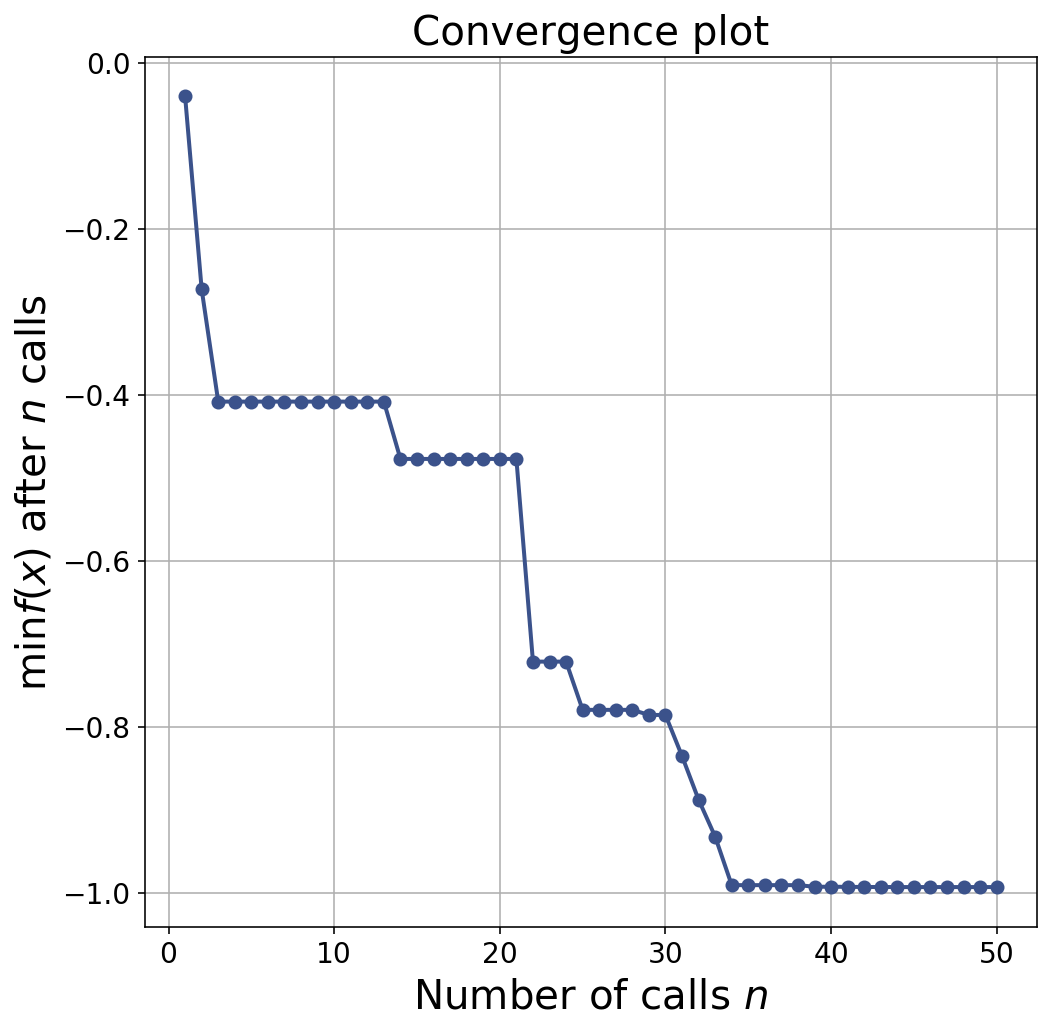

In [16]:
plots.plot_convergence(res);

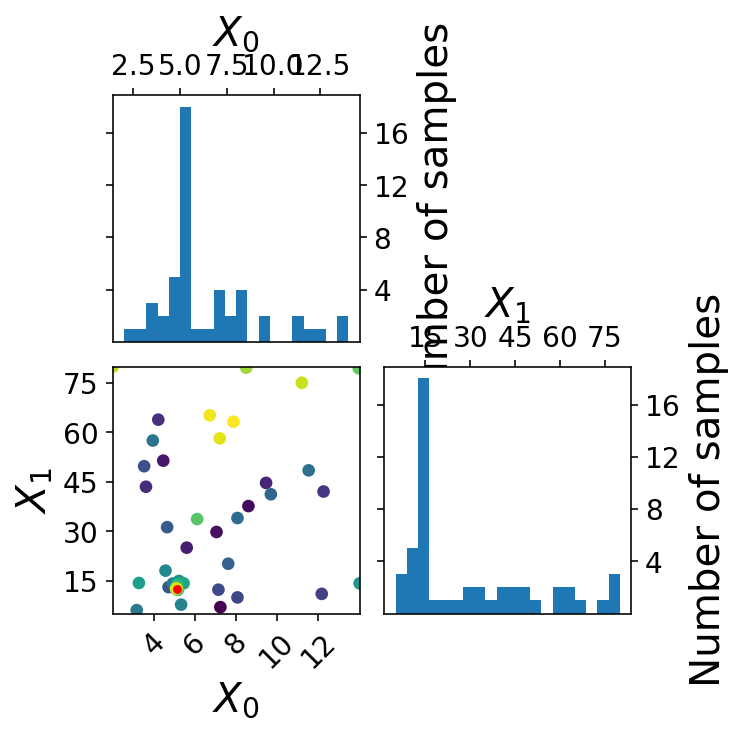

In [17]:
plots.plot_evaluations(res);

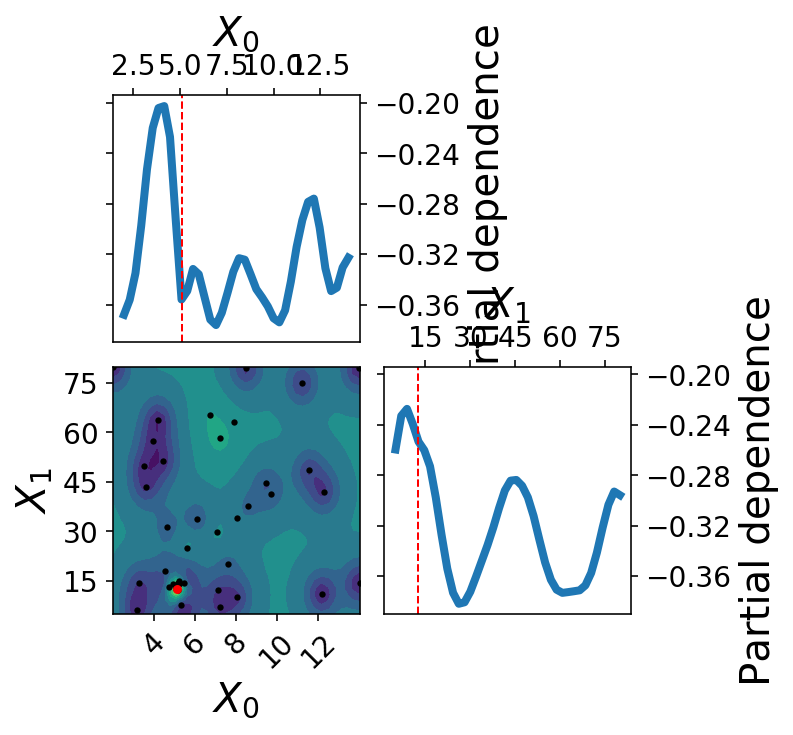

In [18]:
plots.plot_objective(res);

In [11]:
h = 0.02
xx, yy = np.meshgrid(np.arange(2, 14, h),
                     np.arange(5, 80, h))
Z = inverse_beer_score(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [12]:
Z.min(), np.c_[xx.ravel(), yy.ravel()][Z.argmin()]

(-0.99332241872141203, array([  5.1 ,  12.56]))

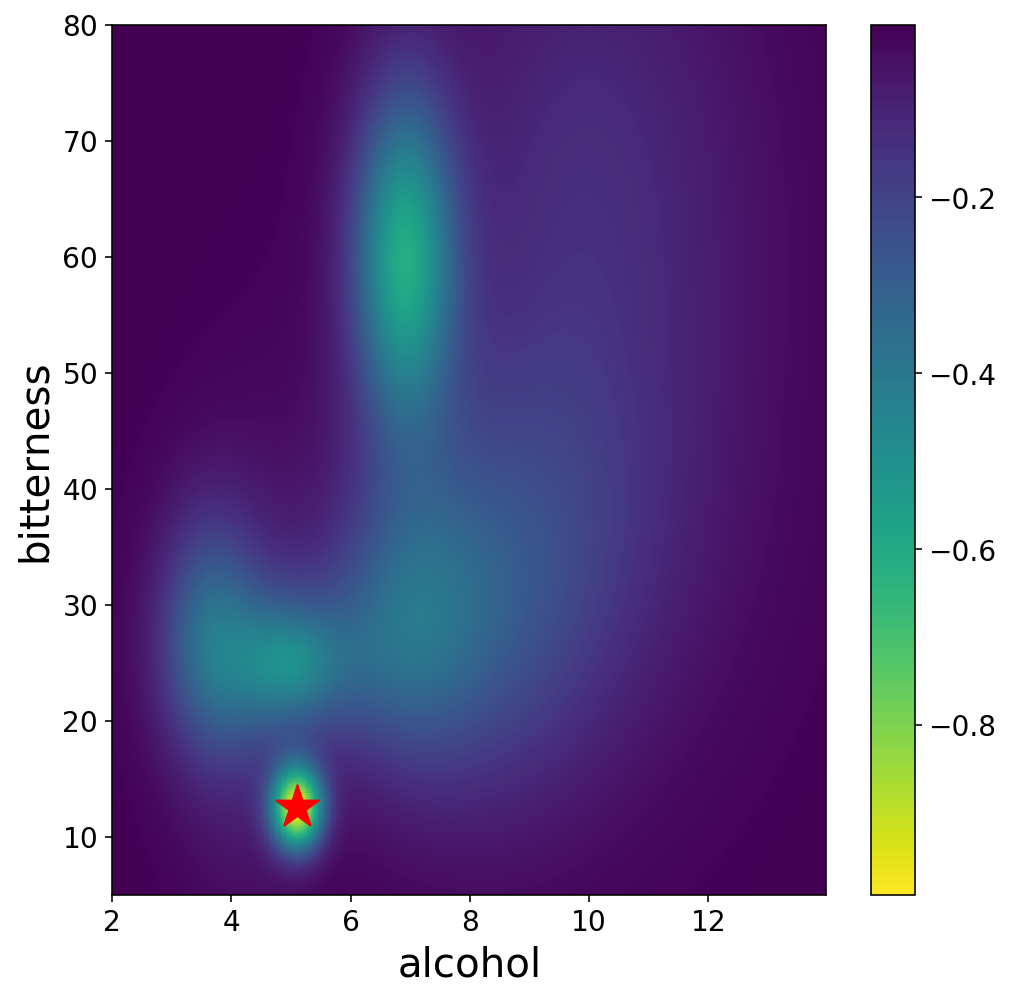

In [36]:
plt.pcolormesh(xx, yy, Z, cmap='viridis_r')
plt.colorbar();
#CS = plt.contour(xx, yy, Z, 10, vmin=-1, vmax=0)
#plt.clabel(CS, inline=1, fontsize=10)

plt.scatter(*res.x, marker="*", color='r', s=500)
plt.ylabel('bitterness')
plt.xlabel('alcohol');

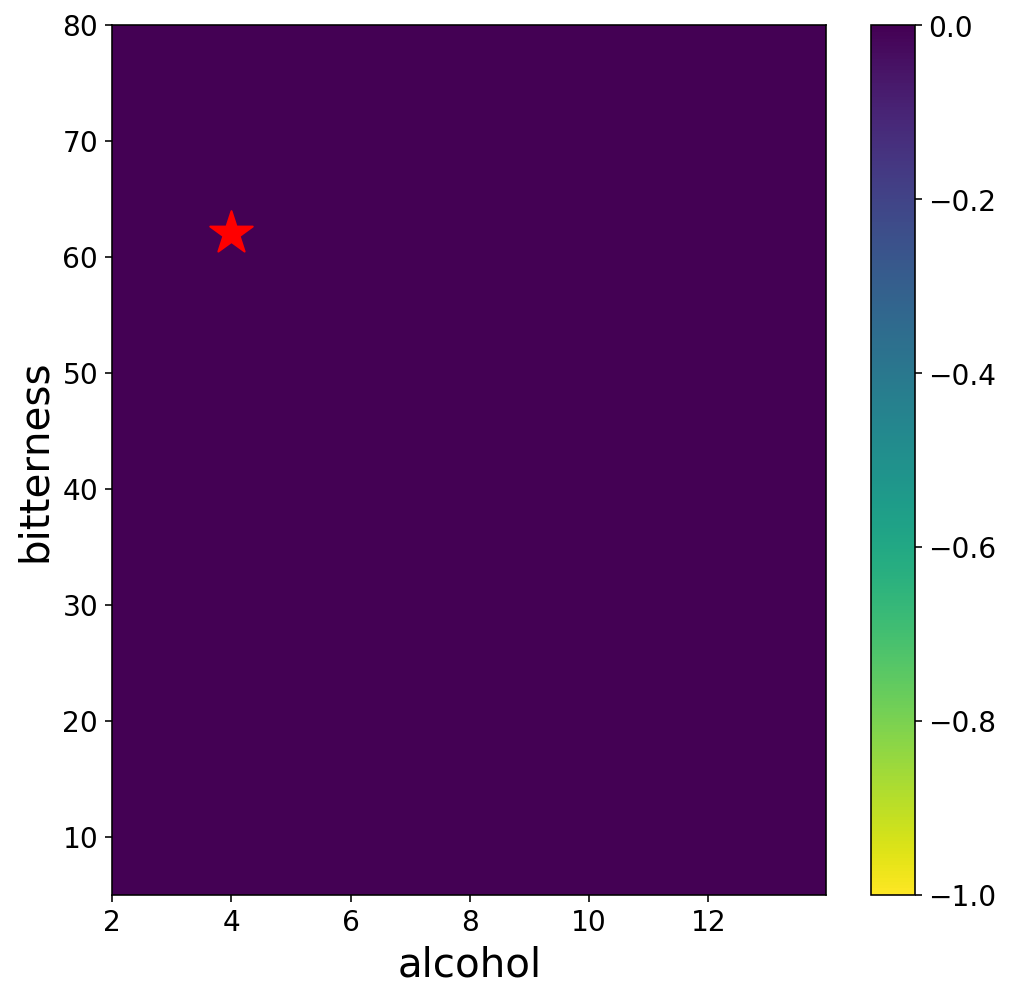

In [44]:
h = 0.02
xx, yy = np.meshgrid(np.arange(2, 14, h),
                     np.arange(5, 80, h))
Z = inverse_beer_score(np.c_[xx.ravel(), yy.ravel()])

Z = np.ones_like(Z.reshape(xx.shape))
plt.pcolormesh(xx, yy, Z, cmap='viridis_r', vmin=-1, vmax=0)
plt.colorbar();
#CS = plt.contour(xx, yy, Z, 10, vmin=-1, vmax=0)
#plt.clabel(CS, inline=1, fontsize=10)

plt.scatter(4, 62, marker="*", color='r', s=500)
plt.ylabel('bitterness')
plt.xlabel('alcohol');

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx, yy, -Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
ax.view_init(0, 40)
ax.set_xlabel('alcohol')
ax.set_zlabel('score')
ax.set_ylabel('bitterness');